# 誤差楕円を可視化する

カルマンフィルタなどを実装していると，分散が本当に小さくなっているのか，またどのように小さくなっていくのか確認したくなるときがあります．

そのような場合に，下記図のように誤差楕円 (Error Ellipse) を可視化することで，直感的に分散が小さくなっていく過程を確認することができます．

<div style="text-align:center">
<img src="./assets/fig1.png" width="300px">
</div>

例えば，位置 $(x, y)$ とその分散を可視化する場合は，$x, y$ それぞれの分散から，誤差を表す楕円のパラメータを計算することで誤差楕円を描画することができます．


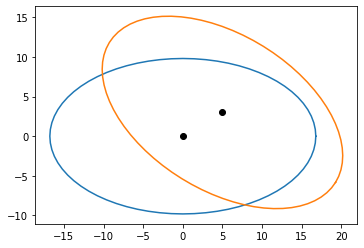

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# ===========================
#* Setting *#
# ===========================

# Object の状態 (位置) と共分散行列
x = np.array([5, 3]).reshape(2, 1)
P = np.array([[25, 9],
              [9, 16]])

# 次元が2で99%の信用区間のカイ二乗値
chi_2 = 9.21034


# ===========================
#* Functions *#
# ===========================

def rad2deg(a):
    return a * 180 / np.pi

def deg2rad(a):
    return a / 180 * np.pi


# ===========================
#* 誤差楕円を算出する *#
# ===========================

# 1. 傾きのない楕円を用意する

# 固有値と固有ベクトルを取得
# ※ 固有ベクトルは列ごとに格納される
#   w1 = w[0]
#   w2 = w[1]
#   v1 = v[:, 0]
#   v2 = v[:, 1]
(w, v) = np.linalg.eig(P)

# 固有値の大きい方と小さい方のインデックスを取得
max_idx = np.argmax(w)
min_idx = np.argmin(w)

# 大きい方の固有値に対応する固有ベクトルの角度を求める
#   np.arctan2(y, x)
ang_r = np.arctan2(v[1, max_idx], v[0, max_idx])
ang_d = ang_r * 180 / np.pi

# 楕円のパラメータを取得する
a = np.sqrt(w[max_idx] * chi_2)
b = np.sqrt(w[min_idx] * chi_2)

# 楕円を用意する
t = list(np.arange(0, deg2rad(360+1), deg2rad(5)))
ell = np.array([a * np.cos(t), b * np.sin(t)])


# 2. 楕円を回転させる

# 誤差楕円の回転
R = np.array([[np.cos(ang_r), np.sin(ang_r)],
              [-np.sin(ang_r), np.cos(ang_r)]])

ell_rotated = np.matmul(R, ell)


# ===========================
#* 楕円を描画する *#
# ===========================

# 楕円を描画
plt.figure()
plt.xticks(np.arange(-25, 25, 5))
plt.yticks(np.arange(-25, 25, 5))
ax = plt.gca() # gets the active axis 
ax.set_aspect(1)

# 回転・平行移動前の誤差楕円
plt.plot(ell[0, :], ell[1, :])
plt.scatter(0, 0, c='k')

# 回転・平行移動後の誤差楕円
plt.plot(ell_rotated[0, :] + x[0], ell_rotated[1, :] + x[1])
plt.scatter(x[0], x[1], c='k')

plt.show()


# References
- [カルマンフィルタにおける誤差楕円の計算方法](https://myenigma.hatenablog.com/entry/20140621/1403336277)
    - [Matlab のソースコード](https://github.com/AtsushiSakai/MATLABRobotics/blob/master/Localization/ExtenedKalmanFilterLocalization/ExtendedKalmanFilterLocalization.m)